This script uses PAMGuide broadband SPL output to generate diel plots representing daily ambient sound levels at four different sites in Tortola, British Virgin Islands.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Create single diel plots by site

In [88]:
# Load CSV file
df = pd.read_csv('/Volumes/SeaBABELa/BVI Mangroves_2024/BVI Mangroves_2024_Working/6880_HansA/6880_HansA_PAMGuide/PAMGuide_Batch_Broadband_Abs_24000ptHannWindow_50pcOlap.csv')

# Rename columns
df.columns = ['mat_date', 'rms']

# Convert MATLAB datenum to datetime
df['datetime'] = pd.to_datetime(df['mat_date'] - 719529, unit='d').round('s')

# Localize to UTC first, then convert to AST (Tortola time)
df['datetime'] = df['datetime'].dt.tz_localize('UTC').dt.tz_convert('America/Puerto_Rico')  # Tortola follows AST


# Extract hour and date
df['hour'] = df.iloc[:, 2].dt.hour
df['date'] = df.iloc[:, 2].dt.date

print(df.head(10))

        mat_date         rms                            datetime  hour  \
0  739267.475197  132.487000 2024-01-16 07:24:16.999976191-04:00     7   
1  739267.475200  109.991043 2024-01-16 07:24:17.250015061-04:00     7   
2  739267.475203  107.816879 2024-01-16 07:24:17.499973475-04:00     7   
3  739267.475205  119.197609 2024-01-16 07:24:17.750012353-04:00     7   
4  739267.475208  126.419312 2024-01-16 07:24:17.999970768-04:00     7   
5  739267.475211  111.393539 2024-01-16 07:24:18.250009637-04:00     7   
6  739267.475214  118.508179 2024-01-16 07:24:18.499968051-04:00     7   
7  739267.475217  119.127419 2024-01-16 07:24:18.750006930-04:00     7   
8  739267.475220  106.463814 2024-01-16 07:24:18.999965335-04:00     7   
9  739267.475223  106.165939 2024-01-16 07:24:19.250004214-04:00     7   

         date  
0  2024-01-16  
1  2024-01-16  
2  2024-01-16  
3  2024-01-16  
4  2024-01-16  
5  2024-01-16  
6  2024-01-16  
7  2024-01-16  
8  2024-01-16  
9  2024-01-16  


<>:6: SyntaxWarning: invalid escape sequence '\ '
<>:6: SyntaxWarning: invalid escape sequence '\ '
/var/folders/49/g8x588256sv4740wwgn3d1tr0000gn/T/ipykernel_41245/435488960.py:6: SyntaxWarning: invalid escape sequence '\ '
  cbar_kws={'label': 'SPL $_{RMS \ 20 Hz - 4 kHz}$'},


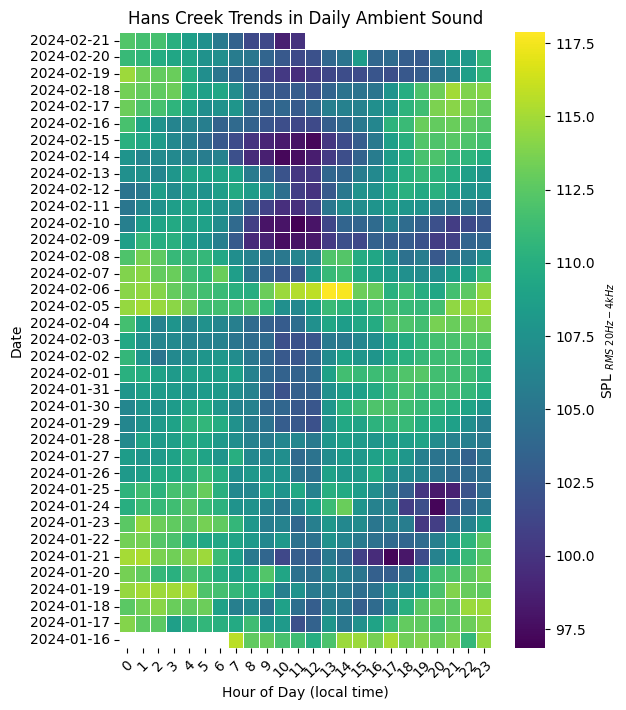

In [46]:
# Create a tile plot for diel pattern
plt.figure(figsize=(6, 8))
ax = sns.heatmap(
    df.pivot_table(index='date', columns='hour', values='rms'),
    cmap='viridis',
    cbar_kws={'label': 'SPL $_{RMS \ 50 Hz - 20 kHz}$'},
    linewidths=0.5
)

# Formatting plot
plt.xlabel('Hour of Day (local time)')
plt.ylabel('Date')
plt.title("Hans Creek Trends in Daily Ambient Sound")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.gca().invert_yaxis()
plt.show()


## Now add all plots onto a grid to make pretty

<>:43: SyntaxWarning: invalid escape sequence '\ '
<>:43: SyntaxWarning: invalid escape sequence '\ '
/var/folders/49/g8x588256sv4740wwgn3d1tr0000gn/T/ipykernel_41245/2616548766.py:43: SyntaxWarning: invalid escape sequence '\ '
  cbar_kws={'label': 'SPL $_{RMS \ 50 Hz - 20 kHz}$'},


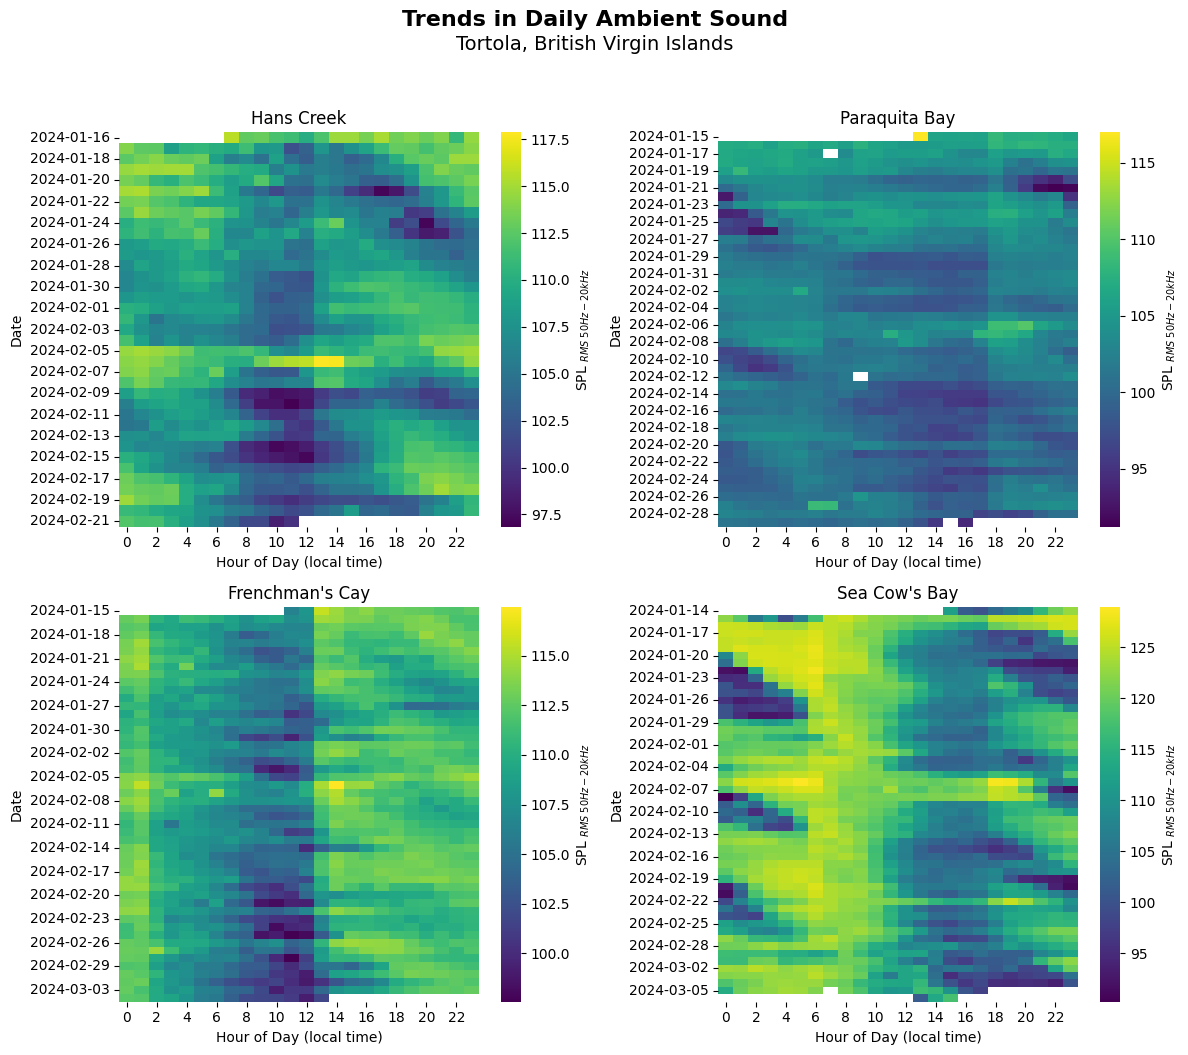

In [53]:
# Define file paths
file_paths = [
    '/Volumes/SeaBABELa/BVI Mangroves_2024/BVI Mangroves_2024_Working/6880_HansA/6880_HansA_PAMGuide/PAMGuide_Batch_Broadband_Abs_24000ptHannWindow_50pcOlap.csv',
    '/Volumes/SeaBABELa/BVI Mangroves_2024/BVI Mangroves_2024_Working/6863_Paraquita/6863_Paraquita_PAMGuide/PAMGuide_Batch_Broadband_Abs_24000ptHannWindow_50pcOlap.csv',
    '/Volumes/SeaBABELa/BVI Mangroves_2024/BVI Mangroves_2024_Working/6879_French/6879_French_PamGuide/PAMGuide_Batch_Broadband_Abs_24000ptHannWindow_50pcOlap.csv',
    '/Volumes/SeaBABELa/BVI Mangroves_2024/BVI Mangroves_2024_Working/6884_SeaCowBay/6884_SeaCowBay_PAMGuide/PAMGuide_Batch_Broadband_Abs_24000ptHannWindow_50pcOlap.csv'
]

# Manually assigned titles for each subplot (matching file order)
titles = ["Hans Creek", "Paraquita Bay", "Frenchman's Cay", "Sea Cow's Bay"]

# Set up a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, (file_path, title) in enumerate(zip(file_paths, titles)):
    # Load the CSV file
    df = pd.read_csv(file_path)
    df.columns = ['mat_date', 'rms']

    # Convert MATLAB datenum to datetime
    df['datetime'] = pd.to_datetime(df['mat_date'] - 719529, unit='d').round('s')

    # Localize to UTC first, then convert to AST (Tortola time)
    df['datetime'] = df['datetime'].dt.tz_localize('UTC').dt.tz_convert('America/Puerto_Rico')

    # Extract hour and date
    df['hour'] = df['datetime'].dt.hour
    df['date'] = df['datetime'].dt.date

    # Create pivot table for heatmap
    pivot_df = df.pivot_table(index='date', columns='hour', values='rms')

    # Get correct subplot
    ax = axs[i // 2, i % 2]

    # Plot heatmap
    sns.heatmap(
        pivot_df,
        cmap='viridis',
        cbar_kws={'label': 'SPL $_{RMS \ 50 Hz - 20 kHz}$'},
        linewidths=0, # Removes white grid lines
        ax=ax  # Assign heatmap to correct subplot
    )

    ax.set_title(title)  # Use manual title
    ax.set_xlabel('Hour of Day (local time)')
    ax.set_ylabel('Date')

# Add major title and subtitle
fig.suptitle("Trends in Daily Ambient Sound", fontsize=16, fontweight='bold', y=1.05)
fig.text(0.5, 1.01, "Tortola, British Virgin Islands", fontsize=14, ha='center')

# Adjust layout
plt.tight_layout()
plt.show()

# Now overlay tidal information on the plot

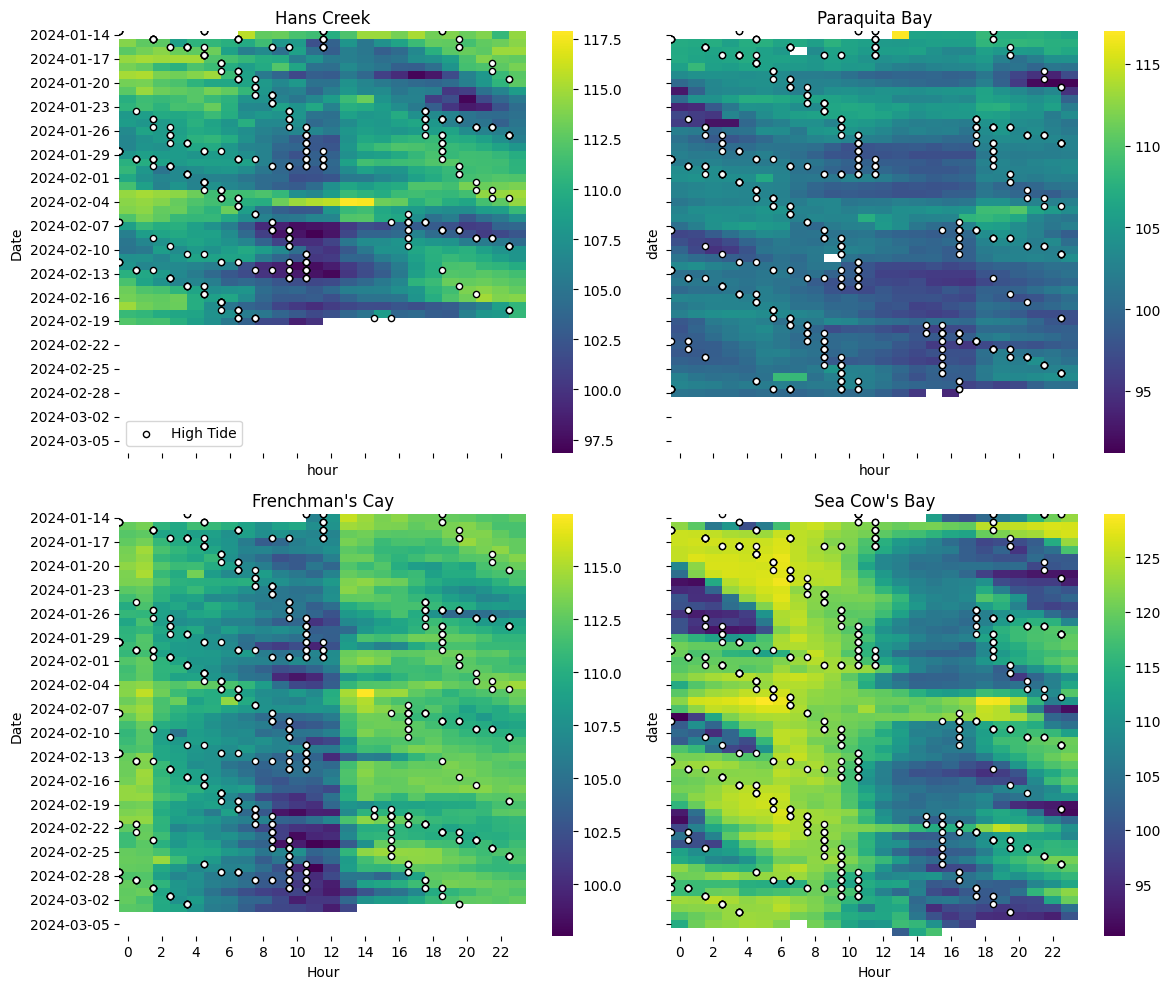

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from noaa_coops import Station
import numpy as np

# Define file paths
file_paths = [
    '/Volumes/SeaBABELa/BVI Mangroves_2024/BVI Mangroves_2024_Working/6880_HansA/6880_HansA_PAMGuide/PAMGuide_Batch_Broadband_Abs_24000ptHannWindow_50pcOlap.csv',
    '/Volumes/SeaBABELa/BVI Mangroves_2024/BVI Mangroves_2024_Working/6863_Paraquita/6863_Paraquita_PAMGuide/PAMGuide_Batch_Broadband_Abs_24000ptHannWindow_50pcOlap.csv',
    '/Volumes/SeaBABELa/BVI Mangroves_2024/BVI Mangroves_2024_Working/6879_French/6879_French_PamGuide/PAMGuide_Batch_Broadband_Abs_24000ptHannWindow_50pcOlap.csv',
    '/Volumes/SeaBABELa/BVI Mangroves_2024/BVI Mangroves_2024_Working/6884_SeaCowBay/6884_SeaCowBay_PAMGuide/PAMGuide_Batch_Broadband_Abs_24000ptHannWindow_50pcOlap.csv'
]

# Manually assigned titles for each subplot
titles = ["Hans Creek", "Paraquita Bay", "Frenchman's Cay", "Sea Cow's Bay"]

# --- NOAA CO-OPS Station Setup ---
usvi = Station(id="9751373")  # Coral Harbor, St. John

# Fetch tidal data
df_tides = usvi.get_data(
    begin_date="20240114",
    end_date="20240305",
    product="predictions",
    datum="MLLW",  # Fetching relative to Mean Lower Low Water
    units="metric",
    time_zone="lst"
)

# Ensure datetime-aware timestamps
df_tides.index = pd.to_datetime(df_tides.index).tz_localize("America/Puerto_Rico")

# Identify High Tide Events (Local Maxima)
df_tides["high_tide"] = (df_tides["v"] == df_tides["v"].rolling(window=5, center=True).max())

# Extract high tide timestamps for plotting
df_high_tides = df_tides[df_tides["high_tide"]].reset_index()[["t", "v"]]
df_high_tides["date"] = df_high_tides["t"].dt.date  # Extract date
df_high_tides["hour"] = df_high_tides["t"].dt.hour  # Extract hour

# --- PLOTTING MULTIPLE SITES ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
legend_added = False # track if the legend has been added

for i, (ax, (file_path, title)) in enumerate(zip(axes.flat, zip(file_paths, titles))):
    # Load the CSV file
    df = pd.read_csv(file_path)
    df.columns = ['mat_date', 'rms']

    # Convert MATLAB datenum to datetime
    df['datetime'] = pd.to_datetime(df['mat_date'] - 719529, unit='d').round('s')

    # Localize to UTC first, then convert to AST (Tortola time)
    df['datetime'] = df['datetime'].dt.tz_localize('UTC').dt.tz_convert('America/Puerto_Rico')

    # Extract hour and date
    df['hour'] = df['datetime'].dt.hour
    df['date'] = df['datetime'].dt.date

    # Create pivot table for heatmap
    df_acoustics = df.pivot_table(index='date', columns='hour', values='rms')

    # Plot heatmap
    sns.heatmap(df_acoustics, cmap="viridis", ax=ax, cbar=True, linewidths=0)

    # Overlay High Tide Markers
    high_tides_site = df_high_tides[df_high_tides["date"].isin(df_acoustics.index)]

    ax.scatter(
        high_tides_site["hour"],  # X-axis: Hour
        high_tides_site["date"].map(lambda d: df_acoustics.index.get_loc(d)),  # Y-axis: Date as index position
        color="white", edgecolors="black", marker="o", s=20, label="High Tide"
    )

    # Labels
    ax.set_title(title)
    if i // 2 == 1:
        ax.set_xlabel("Hour")  # Keep x-axis label only for bottom plots
    if i % 2 == 0:
        ax.set_ylabel("Date")  # Keep y-axis label only for left plots

    if not legend_added:
        ax.legend()
        legend_added = True

plt.tight_layout()
plt.show()